In [1]:
using AlgebraicStockFlow
 using Catlab
 using Catlab.CategoricalAlgebra
 using LabelledArrays
 using OrdinaryDiffEq
 using Plots
 using Catlab.Graphics
 using Catlab.Programs
 using Catlab.Theories
 using Catlab.WiringDiagrams

# Input Model

In [4]:
#(stock_name=>(inflows, outflows, variables, svariables))
     ## if a stock has no inflow or no outflow, use keyword ":F_NONE"
     ## if a stock has no variables connect to, use keyword ":V_NONE"
     ## if a stock has no sum_variables connect to, use keyword ":SV_NONE"
#(flow=>variable)
#(variable=>function)
#(svariable=>variable)
     ## if sum_variable contributes to no variables, use keywork ":SVV_NONE"
Input_Model=StockAndFlow(
    (:V => (:LtoV, :decayingV, :var_decayingV, :SV_NONE),
    :L => (:F_NONE, (:LtoV,:decayingLipidNanoparticles), (:var_LtoV,:var_decayingLipidNanoparticles), :SV_NONE)),
    (:LtoV=>:var_LtoV,:decayingV=>:var_decayingV,:decayingLipidNanoparticles=>:var_decayingLipidNanoparticles),
    (:var_LtoV => (u, uN, p, t) -> p.μLV * u.L, :var_decayingV => (u, uN, p, t) -> p.γ_V*u.V, :var_decayingLipidNanoparticles => (u, uN, p, t) -> p.γ_L*u.L),
    ()
)

StockAndFlow with elements S = 1:2, SV = 1:0, LS = 1:0, F = 1:3, I = 1:1, O = 1:3, V = 1:3, LV = 1:3, LSV = 1:0
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     V │
│ 2 │     L │
└───┴───────┘
┌───┬────┬────────────────────────────┐
│ F │ fv │                      fname │
├───┼────┼────────────────────────────┤
│ 1 │  1 │                       LtoV │
│ 2 │  2 │                  decayingV │
│ 3 │  3 │ decayingLipidNanoparticles │
└───┴────┴────────────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   1 │  2 │
│ 3 │   3 │  2 │
└───┴─────┴────┘
┌───┬───────────┬────────────────────────────────┐
│ V │ funcDynam │                          vname │
├───┼───────────┼────────────────────────────────┤
│ 1 │        #1 │                       var_LtoV │
│ 2 │        #2 │                  var_decayingV │
│ 3 │        #3 │ var_decayingLipidNanoparticles │
└───┴───────────┴────────────────────────────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   2 │
│  2 │   2 │   1 │
│  3 │   2 │   3 │
└────┴─────┴─────┘

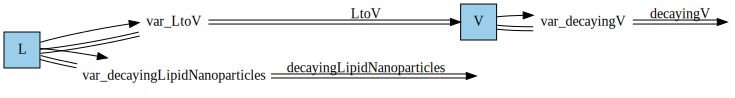

In [5]:
Graph(Input_Model)

# Action Model

# Output Model

# Composition

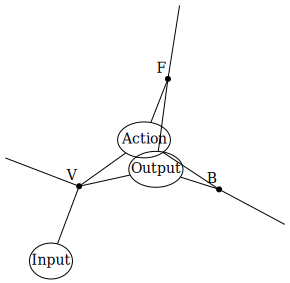

In [6]:
# define the UWD-algebra
covid_immune = @relation (V,B,F) begin
    Input(V)
    Action(V,B,F)
    Output(V,B,F)
end;
display_uwd(covid_immune)